In [ ]:
import csv
from collections import defaultdict

# Define the path to your CSV file and the column name you want to analyze
csv_file_path = "repositories.csv"
column_name = "stargazers_count"

# Dictionary to store the count of each value in the specified column
value_counts = defaultdict(int)

# Open and read the CSV file
with open(csv_file_path, mode="r", newline="", encoding="utf-8") as file:
    reader = csv.DictReader(file)  # Use DictReader to access columns by name
    
    # Iterate through each row
    for row in reader:
        # Get the value in the specified column
        value = row[column_name]
        
        # Increment the count of the value in the dictionary if it's not empty
        if value:
            value_counts[value] += 1

# Sort the dictionary by values in descending order and get the top 3
top_3_values = sorted(value_counts.items(), key=lambda item: item[1], reverse=True)[:3]

# Print the top 3 values
print("Top 3 most frequent values in the column:")
for value, count in top_3_values:
    print(f"{value}: {count}")


Top 3 most frequent values in the column:
0: 2316
1: 687
2: 326


CORRELATION

In [20]:
X = [13382,8677,5181,3761,3398,2732,2668,2452,2303,1847,1742,1680,1447,1212,1209,1195,1084,1080,989,961,927,862,847,837,813,812,786,782,782,776]
Y = [165,125,34,24,84,229,104,6,143,471,242,147,411,148,113,205,98,171,193,66,214,127,59,155,107,155,215,182,22,175]

n = len(X)

summation_X = sum(X)
summation_Y = sum(Y)

X_sq = [i**2 for i in X]
Y_sq = [i**2 for i in Y]

summation_X_sq = sum(X_sq)
summation_Y_sq = sum(Y_sq)

X_into_y = []

for i in range(len(X)):
    X_into_y.append(X[i]*Y[i])

# print(X_into_y)

summation_X_into_y = sum(X_into_y)

numerator = (n*summation_X_into_y) - (summation_X*summation_Y)
denominator = (((n*summation_X_sq) - (summation_X)**2)*((n*summation_Y_sq) - (summation_Y)**2))**(0.5)

r = numerator/denominator
print(r)

-0.1003081176659267


Estimated additional followers per additional public repository: -2.6623504498307184


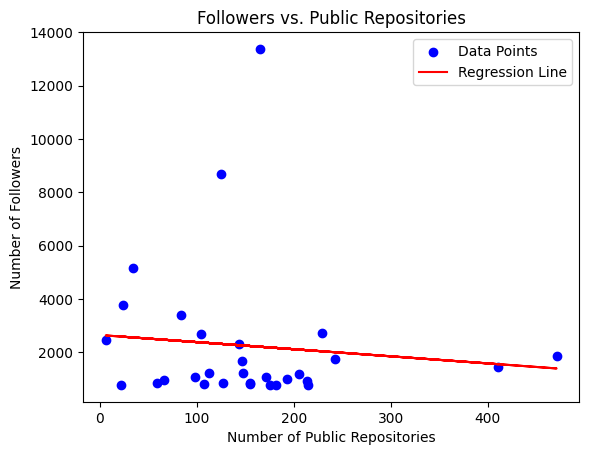

-2.6623504498307184


In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data (replace these with your actual data)
public_repos = np.array([165,125,34,24,84,229,104,6,143,471,242,147,411,148,113,205,98,171,193,66,214,127,59,155,107,155,215,182,22,175])  # Example public repositories
followers = np.array([13382,8677,5181,3761,3398,2732,2668,2452,2303,1847,1742,1680,1447,1212,1209,1195,1084,1080,989,961,927,862,847,837,813,812,786,782,782,776])  # Example followers

# Reshape data for sklearn
X = public_repos.reshape(-1, 1)  # Independent variable (public repos)
y = followers  # Dependent variable (followers)

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression coefficient (slope)
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Estimated additional followers per additional public repository: {slope}")

# Optional: Visualize the regression line
plt.scatter(public_repos, followers, color='blue', label='Data Points')
plt.plot(public_repos, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Number of Public Repositories')
plt.ylabel('Number of Followers')
plt.title('Followers vs. Public Repositories')
plt.legend()
plt.show()

print(slope)

In [ ]:
import pandas as pd

# Define the path to your CSV file
csv_file_path = "repositories.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Replace TRUE and FALSE with 1 and 0
df['has_projects'] = df['has_projects'].replace({"TRUE": 1, "FALSE": 0})
df['has_wiki'] = df['has_wiki'].replace({"TRUE": 1, "FALSE": 0})

# Calculate the correlation coefficient between the two columns
correlation_coefficient = df['has_projects'].corr(df['has_wiki'])

# Print the result
print(f"The correlation coefficient between 'column1' and 'column2' is: {correlation_coefficient}")


The correlation coefficient between 'column1' and 'column2' is: 0.311383307159852


In [ ]:
import pandas as pd

df = pd.read_csv("users.csv")

bio_len = []
followers = [13382,8677,5181,3761,3398,2732,2668,2452,2303,1847,1742,1680,1447,1212,1209,1195,1084,1080,989,961,927,862,847,837,813,812,786,782,782,776]

for i in df['Bio'].dropna():
    s = i.split(" ")
    # print(s)
    bio_len.append(len(s))

print(bio_len)


[6, 8, 20, 10, 9, 26, 20, 21, 9, 19, 18, 2, 14, 4, 13, 9, 9, 13, 6, 1, 6, 6, 23]


In [63]:
followers = [13382,8677,5181,3761,3398,2732,2668,2452,2303,1847,1742,1680,1447,1212,1209,1195,1084,1080,989,961,927,862,847,837,813,812,786,782,782,776]
bio_len = [6, 8, 20, 0, 10, 9, 26, 20, 21, 0, 9, 0, 19, 0, 18, 0, 2, 14, 4, 13, 9, 9, 13, 6, 0, 1, 0, 6, 6, 23]
# print(len(bio_len))

X = followers
Y = bio_len

n = len(X)

summation_X = sum(X)
summation_Y = sum(Y)

X_sq = [i**2 for i in X]
Y_sq = [i**2 for i in Y]

summation_X_sq = sum(X_sq)
summation_Y_sq = sum(Y_sq)

X_into_y = []

for i in range(len(X)):
    X_into_y.append(X[i]*Y[i])

# print(X_into_y)

summation_X_into_y = sum(X_into_y)

numerator = (n*summation_X_into_y) - (summation_X*summation_Y)
denominator = (((n*summation_X_sq) - (summation_X)**2)*((n*summation_Y_sq) - (summation_Y)**2))**(0.5)

r = numerator/denominator
print(f"Correlation coefficient is: {r}")

sd_X = ((summation_X_sq/n) - (summation_X/n)**2)**(0.5)
sd_Y = ((summation_Y_sq/n) - (summation_Y/n)**2)**(0.5)

regression_slope = r * (sd_Y/sd_X)

print(f"Standard Deviation of X (followers) is: {sd_X}")
print(f"Standard Deviation of Y (bio length) is: {sd_Y}")
print(f"Regression Slope is: {regression_slope}")

Correlation coefficient is: 0.045044365578656334
Standard Deviation of X (followers) is: 2638.8935484403305
Standard Deviation of Y (bio length) is: 7.856773440089062
Regression Slope is: 0.00013411051586875004


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("users.csv")

# Total number of users
total_users = len(df)

# Filter hireable users and calculate the fraction with email
hireable_users = df[df['Hireable'] == True]
hireable_with_email = hireable_users['Email'].notna().sum()
fraction_hireable_with_email = hireable_with_email / len(hireable_users) if len(hireable_users) > 0 else 0

# Filter non-hireable users and calculate the fraction with email
non_hireable_users = df[df['Hireable'] == False]
non_hireable_with_email = non_hireable_users['Email'].notna().sum()
fraction_non_hireable_with_email = non_hireable_with_email / len(non_hireable_users) if len(non_hireable_users) > 0 else 0

# Calculate the difference
difference = round(fraction_hireable_with_email - fraction_non_hireable_with_email, 3)

# Print the result
print(f"Difference in fractions: {difference}")


Difference in fractions: 0.625
